In [15]:
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
from Protocols.pacing_protocol import PacingProtocol

import scipy_simulator

sys.path.append('../models')

In [11]:
from Models.hh1592d import HH1592d
'''
Hodgkin Huxley 1592d
'''
protocol = PacingProtocol(level=1, start=5, length=0.03, period=30, multiplier=0, default_time_unit='ms')
model = HH1592d(protocol)
model.name = "Hodgkin Huxley 1592d"
t_span = (0, 60)

# Start simulation
start_time = time.time()

simulator = scipy_simulator.Simulator(model)
simulator.simulate(t_span, method='LSODA', max_step=8e-4)    

print("--- %s seconds ---"%(time.time()-start_time))

--- 7.378857135772705 seconds ---


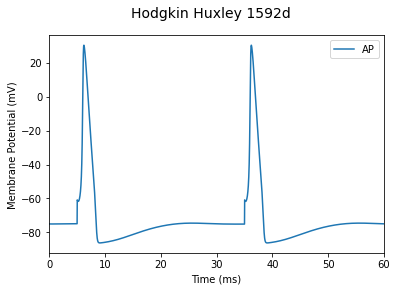

In [16]:
fig, ax = plt.subplots(figsize=(6,4))    
fig.suptitle(model.name, fontsize=14)
# ax.set_title('Simulation %d'%(simulationNo))
ax.set_xlim(model.times.min(), model.times.max())
# ax.set_ylim(ylim[0], ylim[1])
ax.set_xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')     
ax.plot(model.times, model.V, label='AP')   
# textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
#     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
#     fig1 = plt.gcf()
ax.legend()
plt.show()
fig.savefig(os.path.join('Results', "Hodgkin-Huxley-1592d"), dpi=100)